## Import Libraries and Dataset

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
start_time = time.time()

df = pd.read_csv("combined_listings2.csv")



## Convert dataset into usable datatypes

In [268]:
#convert money into a float
df["price"] = df["price"].replace('[\$\,]',"",regex=True).astype(float)

## Sanity Check

In [269]:
# Examine all the attributes for invalid data
# Check if Id is a valid number (greater than 0)
df = df[df['id'] >= 1]
# Total listing should be greater than or equal to 1
df = df[df['host_total_listings_count'] >= 1]
# Check the integer values related to the property - should be at least 1
df = df[df['bedrooms'] >= 1]
df = df[df['beds'] >= 1]
# Check and remove negative numbered property listings
df = df[df['price'] >= 0]
# Minimum and Maximum nights must be at least 1
df = df[df['minimum_nights'] >= 1]
df = df[df['maximum_nights'] >= 1]
# Avaliability must be greater than or equal to 0 
df = df[df['availability_30'] >= 0]
df = df[df['availability_60'] >= 0]
df = df[df['availability_90'] >= 0]
df = df[df['availability_365'] >= 0]
# must also be no more than the number of days of their category 
# (avaliability_30 must not exceed 30 days)
df = df[df['availability_30'] <= 30]
df = df[df['availability_60'] <= 60]
df = df[df['availability_90'] <= 90]
df = df[df['availability_365'] <= 365]
# Number of reviews - should be greater than or equal to 0
df = df[df['number_of_reviews'] >= 0]
df = df[df['number_of_reviews_ltm'] >= 0]
df = df[df['number_of_reviews_l30d'] >= 0]
# Review scores - Check for incorrect values across all aspects
df = df[df['review_scores_rating'] >= 0]
df = df[df['review_scores_rating'] <= 100]
df = df[df['review_scores_accuracy'] >= 0]
df = df[df['review_scores_accuracy'] <= 10]
df = df[df['review_scores_cleanliness'] >= 0]
df = df[df['review_scores_cleanliness'] <= 10]
df = df[df['review_scores_checkin'] >= 0]
df = df[df['review_scores_checkin'] <= 10]
df = df[df['review_scores_communication'] >= 0]
df = df[df['review_scores_communication'] <= 10]
df = df[df['review_scores_location'] >= 0]
df = df[df['review_scores_location'] <= 10]
df = df[df['review_scores_value'] >= 0]
df = df[df['review_scores_value'] <= 10]
# Calculated host listings - check for invalid entries
df = df[df['calculated_host_listings_count'] >= 0]
df = df[df['calculated_host_listings_count_entire_homes'] >= 0]
df = df[df['calculated_host_listings_count_private_rooms'] >= 0]
df = df[df['calculated_host_listings_count_shared_rooms'] >= 0]
df = df[df['reviews_per_month'] >= 0]


## Remove outliers

In [270]:
selected = df[['price','availability_30']].copy();
var = 0
# Calculate Z Score for each variable and column creating a new column for each one
for column in selected:
    column_z_score = column + '_z_score'
    if var < 5: # If the five Z score columns haven't been made yet create them
        selected[column_z_score] = (selected[column] - selected[column].mean())/selected[column].std(ddof=0)
        var = var + 1

        
        
#select the city

#selected = selected.loc[df['location'] == "melbourne"]
#selected = selected.loc[df['location'] == "sydney"]
selected.info()

        
#remove the outliers based upon z score
selected = selected.loc[selected['price_z_score'].abs() <= 5]


#removed 0 days.
selected = selected[selected["availability_30"] > 1]






<class 'pandas.core.frame.DataFrame'>
Int64Index: 31719 entries, 0 to 51758
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    31719 non-null  float64
 1   availability_30          31719 non-null  int64  
 2   price_z_score            31719 non-null  float64
 3   availability_30_z_score  31719 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.2 MB


In [271]:
#change the selected city part
#selected.to_csv("modified_listings_sydney.csv");

## Implementation

In [272]:
class LinearRegression:
    def __init__( self, x, y,learningRate,epochs):
        #initialising values 
        self.x = x
        self.y = y
        self.bias = 0
        self.slope = 0       
        self.length = len(x)
        self.learningRate = learningRate
        self.epochs = epochs
        self.loss = []
        
    def fit( self):         
        #gradient descent
        for i in range(self.epochs):
            #update predication
            y_pred = self.slope * self.x + self.bias
            
            #keep track of mse
            mse = (1/self.length) * np.sum((self.y - y_pred)**2)
            self.loss.append(mse)
            
            #working out the new gradient. 
            derivativeSlope = ( -2 / self.length) * np.sum( self.x * ( self.y - y_pred ))
            derivativeBias = ( -2 / self.length) * np.sum( self.y - y_pred )
             
            #updating the values
            self.slope = self.slope - self.learningRate * derivativeSlope
            self.bias = self.bias - self.learningRate * derivativeBias
            
    def mse( self):
        return self.loss  
    
    def predict_print( self):
        print(self.slope, " * " , " x + " ,  self.bias)
        
    
    def predict( self , X):
        y_pred = self.slope * X + self.bias 
        return y_pred


    

X = np.array(selected["availability_30"])
Y = np.array(selected["price"])    
#LinearRegression(x,y,learningrate,epochs)    
model = LinearRegression(X,Y,0.001, 1000)
#0.001, 1000
model.fit()



## Plot

MSE : 30641.4128645898
[ 39.30503761  44.22491513  49.14479266  54.06467018  58.98454771
  63.90442523  68.82430276  73.74418028  78.66405781  83.58393534
  88.50381286  93.42369039  98.34356791 103.26344544 108.18332296
 113.10320049 118.02307801 122.94295554 127.86283306 132.78271059
 137.70258811 142.62246564 147.54234316 152.46222069 157.38209822
 162.30197574 167.22185327 172.14173079 177.06160832]
4.919877525327197  *   x +  29.465282556709198


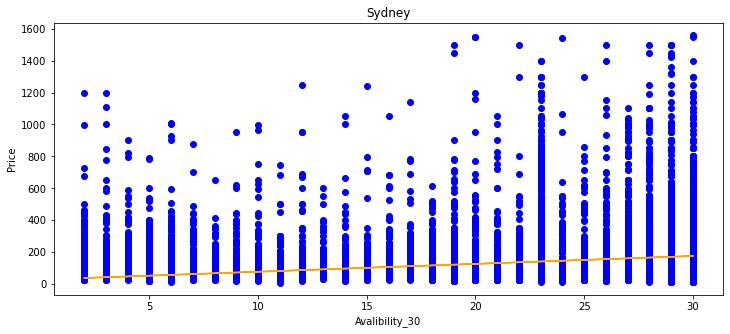

--- 2.9441566467285156 seconds ---


In [273]:
#print("Initial MSE : " + str(model.mse()[0]))
print("MSE : " + str(model.mse()[-1]))

#graphing predictive points.. we will create a line using these points
y_pred = model.predict(X)
print(np.unique(y_pred))
model.predict_print()

#ploting the graph
plt.figure(figsize = (12,5))
plt.scatter(X , Y, color = 'blue')
plt.plot(X , y_pred , color = 'orange' )
plt.title('Sydney')
plt.ylabel('Price')
plt.xlabel('Avalibility_30')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))